강의안 출처: 러닝스푼즈_나노디그리3기_파이썬 기초와 시각화_박조은 강사님

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-01-apt-output)


# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [3]:
%pwd  #현재파일 디렉토리 확인

'C:\\Users\\lhj90\\Documents\\나노디그리 데이터분석3기\\4. Python 기초\\실습자료\\3차시'

In [12]:
%ls data  #매직커맨드. 유닉스 명령어

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5206-E831

 C:\Users\lhj90\Documents\나노디그리 데이터분석3기\4. Python 기초\실습자료\3차시\data 디렉터리

2021-02-08  오후 01:57    <DIR>          .
2021-02-08  오후 01:57    <DIR>          ..
2021-02-08  오후 01:57            57,732 seoul_municipalities_geo_simple.json
2021-02-08  오후 01:57       264,920,940 상가업소정보_201912_01.csv
2021-02-08  오후 01:57             2,163 ㅈㅓㄴㄱㅜㄱ ㅍㅕㅇㄱㅠㄴ ㅂㅜㄴㅇㅑㅇㄱㅏㄱㅕㄱ(2013ㄴㅕㄴ 9ㅇㅝㄹㅂㅜㅌㅓ 2015ㄴㅕㄴ 8ㅇㅝㄹㄲㅏㅈㅣ).csv
2021-02-08  오후 01:57           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
2021-02-08  오후 01:57           149,663 주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv
               5개 파일         265,293,008 바이트

 C:\Users\lhj90\Documents\나노디그리 데이터분석3기\4. Python 기초\실습자료\3차시 디렉터리


 C:\Users\lhj90\Documents\나노디그리 데이터분석3기\4. Python 기초\실습자료\3차시 디렉터리


 C:\Users\lhj90\Documents\나노디그리 데이터분석3기\4. Python 기초\실습자료\3차시 디렉터리



파일을 찾을 수 없습니다.


In [3]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np

# 경고 메시지는 출력되지 않게 합니다.
import warnings
warnings.filterwarnings("ignore")

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [4]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949", engine="python")
df_last.shape

(4335, 5)

In [15]:
# head 로 파일을 미리보기 합니다.

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [16]:
# tail 로도 미리보기를 합니다.

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [23]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5206-E831

 C:\Users\lhj90\Documents\나노디그리 데이터분석3기\4. Python 기초\실습자료\3차시\data 디렉터리

2021-02-08  오후 03:07    <DIR>          .
2021-02-08  오후 03:07    <DIR>          ..
2021-02-08  오후 01:57            57,732 seoul_municipalities_geo_simple.json
2021-02-08  오후 01:57       264,920,940 상가업소정보_201912_01.csv
2021-02-08  오후 01:57             2,163 전국평균분양가격(2013년 9월부터 2015년 8월까지).csv
2021-02-08  오후 01:57           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
2021-02-08  오후 01:57           149,663 주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv
               5개 파일         265,293,008 바이트
               2개 디렉터리  81,918,562,304 바이트 남음


In [5]:
df_first = pd.read_csv("data/전국평균분양가격(2013년 9월부터 2015년 8월까지).csv", 
                       encoding="cp949")
df_first.shape

(17, 22)

In [25]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [26]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [27]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [28]:
True == 1

True

In [29]:
False == 0

True

In [30]:
True + True + False

2

In [37]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


In [36]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [35]:
# isna 를 통해 결측치를 구합니다.
#na : not available
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [40]:
# null 값의 비율 : 0과 1로 이루어진 변수이므로, 평균을 구하면 비율이 나온다. 
df_last.isna().mean() * 100

지역명        0.00000
규모구분       0.00000
연도         0.00000
월          0.00000
분양가격(㎡)    6.38985
dtype: float64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [47]:
pd.to_numeric(df_last["분양가격(㎡)"])  # 강의듣고 다시 메모할것...   

ValueError: Unable to parse string "  " at position 28

In [48]:
# 에러 해결 : 비어있는 값 (" ")을 결측치로 변환한다  shift+tab 눌러서 pd.to_numeric 메서드 사용법 확인할 것
pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

In [49]:
type(np.nan)  # 결측치의 데이터 타입이 float이기때문에 위의 분양가격 데이터타입이 정수가 아닌 float로 변환된다

float

In [6]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [7]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [53]:
# info를 통해 분양가격을 봅니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [54]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.

df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [55]:
df_last["분양가격(㎡)"].unique()  #unique한 값들을 array로 출력한다 

array(['5841', '5652', '5882', ..., '3143', '2640', '3065'], dtype=object)

In [60]:
len(df_last["분양가격(㎡)"].unique())  # unique값의 갯수. nan 포함 

1754

In [59]:
df_last["분양가격(㎡)"].nunique() #describe()에 표기된 unique값 갯수를 출력. nan은 제외하고 센다.

1753

In [63]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
# 수치데이터에서는 결측치 처리를 해줬기 때문에 문자형 데이터에 비해 count가 줄어들었다. 

df_last["평당분양가격"].describe() 

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

단위: 1,000원 /
전국 평균 : 1,069 만원 /
전국 중앙값 : 948만원 /
75%: 1,175만원  <-> Max: 4200만원 : 극단적 Max값이 평균값을 끌어 올렸음

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [8]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [9]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","")
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [ ]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [70]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [10]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열   default : 0
df_last = df_last.drop(["규모구분", "분양가격(㎡)","분양가격"], axis=1)

In [11]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~


In [12]:
# 제거가 잘 되었는지 확인 합니다.
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체


In [13]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   평당분양가격  3957 non-null   float64
 4   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [14]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [15]:
#여러개 함수 보기  
# by agg([])
df_last.groupby(["지역명","전용면적"])["평당분양가격"].agg(["mean","median"])

mean   median
지역명 전용면적                          
강원  102㎡~     8311.380000  7906.80
    60㎡       7567.098000  7487.70
    60㎡~85㎡   7485.588000  7494.30
    85㎡~102㎡  8749.557143  9339.00
    전체        7477.536000  7517.40
...                   ...      ...
충북  102㎡~     8195.352000  8250.00
    60㎡       7103.118000  7121.40
    60㎡~85㎡   7264.488000  7099.95
    85㎡~102㎡  8391.306000  8500.80
    전체        7219.014000  7010.85

[85 rows x 2 columns]

In [16]:
#by discribe()
df_last.groupby(["지역명","전용면적"])["평당분양가격"].describe()

count         mean          std     min       25%      50%  \
지역명 전용면적                                                                   
강원  102㎡~      50.0  8311.380000  1115.691068  7164.3  7571.850  7906.80   
    60㎡        50.0  7567.098000   587.618803  6656.1  6997.650  7487.70   
    60㎡~85㎡    50.0  7485.588000   452.293770  6831.0  7060.350  7494.30   
    85㎡~102㎡   42.0  8749.557143  1572.342369  6639.6  7329.300  9339.00   
    전체         50.0  7477.536000   489.686017  6824.4  7037.250  7517.40   
...             ...          ...          ...     ...       ...      ...   
충북  102㎡~      50.0  8195.352000   582.406513  7329.3  7560.300  8250.00   
    60㎡        50.0  7103.118000   436.441132  6319.5  6785.625  7121.40   
    60㎡~85㎡    50.0  7264.488000   554.984472  6543.9  6758.400  7099.95   
    85㎡~102㎡   50.0  8391.306000   743.206116  6164.4  7547.925  8500.80   
    전체         50.0  7219.014000   571.406859  6494.4  6747.675  7010.85   

                   75%      max  
지역명 전용면적                         
강원  102㎡~     8794.500  11873.4  
    60㎡       8091.600   8494.2  
    60㎡~85㎡   7772.325   8322.6  
    85㎡~102㎡  9972.600  10985.7  
    전체        7784.700   8362.2  
...                ...      ...  
충북  102㎡~     8838.225   9150.9  
    60㎡       7523.175   7748.4  
    60㎡~85㎡   7641.150   8698.8  
    85㎡~102㎡  8992.500   9421.5  
    전체        7604.850   8698.8  

[85 rows x 8 columns]

In [17]:
# key value별로 다르게 보기 
df_last.groupby(["지역명","전용면적"]).agg({"평당분양가격" : np.mean, "연도" : np.median})

평당분양가격    연도
지역명 전용면적                       
강원  102㎡~     8311.380000  2017
    60㎡       7567.098000  2017
    60㎡~85㎡   7485.588000  2017
    85㎡~102㎡  8749.557143  2017
    전체        7477.536000  2017
...                   ...   ...
충북  102㎡~     8195.352000  2017
    60㎡       7103.118000  2017
    60㎡~85㎡   7264.488000  2017
    85㎡~102㎡  8391.306000  2017
    전체        7219.014000  2017

[85 rows x 2 columns]

In [18]:
# 전용면적으로 분양가격의 평균을 구합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [19]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [20]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [31]:
#데이터프레임
g.unstack().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.
* pivot_table로 할 수 있는 작업은 groupby로 모두 할 수 있으며, groupby가 더 빠르므로 groupby를 추천한다

In [24]:
%timeit df_last.groupby("지역명").mean()

4.24 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit pd.pivot_table(data = df_last, index = "지역명")

12.4 ms ± 528 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [ ]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()

In [34]:
df_last.groupby(["전용면적"])["평당분양가격"].mean().to_frame()

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [35]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [36]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()  #unstack으로 컬럼을 만든다. 

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [37]:
df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round() #coulums를 지정하여 컬럼을 만든다

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [39]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


In [42]:
#groupby
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [75]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
#plt.rc("font", family="Apple Gothic")

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

<AxesSubplot:xlabel='지역명'>

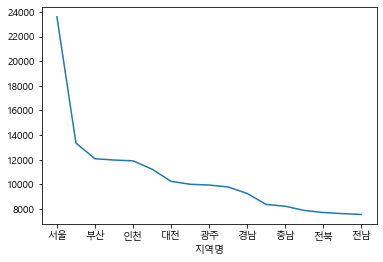

In [76]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

<AxesSubplot:xlabel='지역명'>

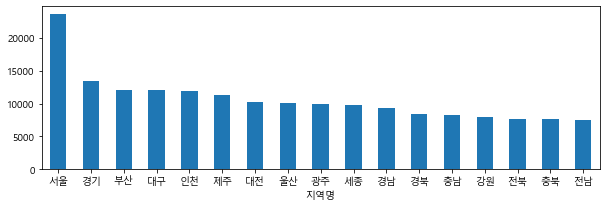

In [77]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g.plot.bar(rot=0, figsize=(10, 3))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

<AxesSubplot:xlabel='전용면적'>

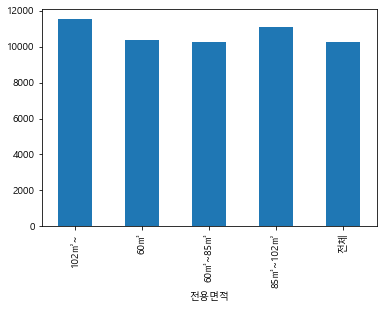

In [78]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

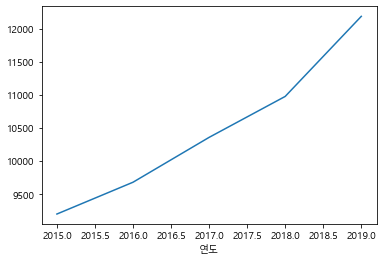

In [79]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

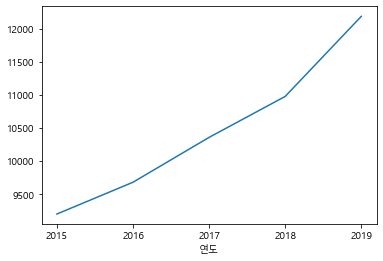

In [80]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# 연도에 소숫점이 생기지 않게 표시하고자 한다면 ax.xaxis.set_major_locator를 사용해서 integer로 설정합니다.
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
df_last.groupby(["연도"])["평당분양가격"].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [81]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격")

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:>

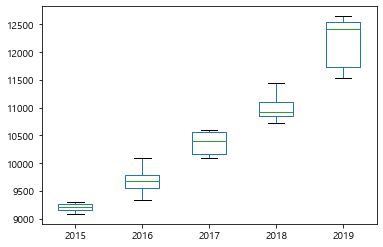

In [82]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

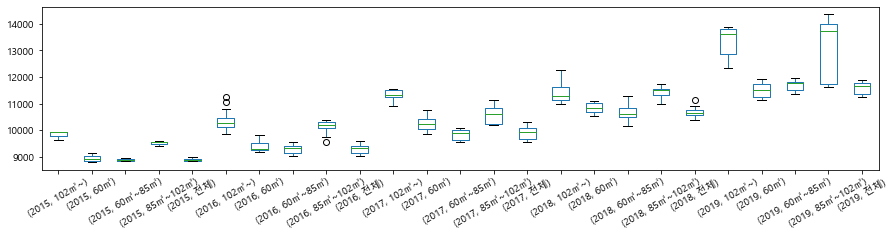

In [83]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

In [84]:
p = df_last.pivot_table(index="연도", columns="지역명", values="평당분양가격")
p

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


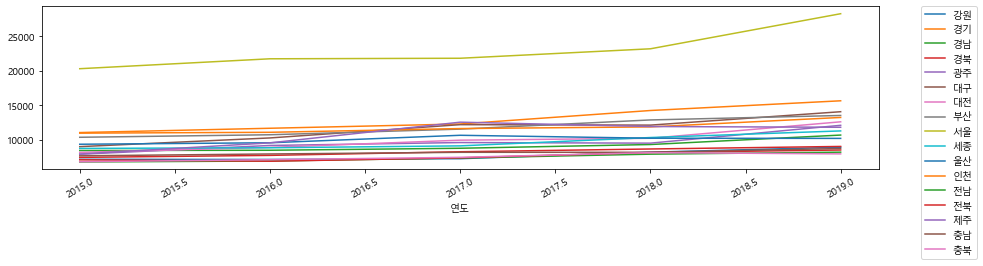

In [85]:
p.plot(figsize=(15, 3), rot=30)
# 그래프의 밖에 legend 표시하도록 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

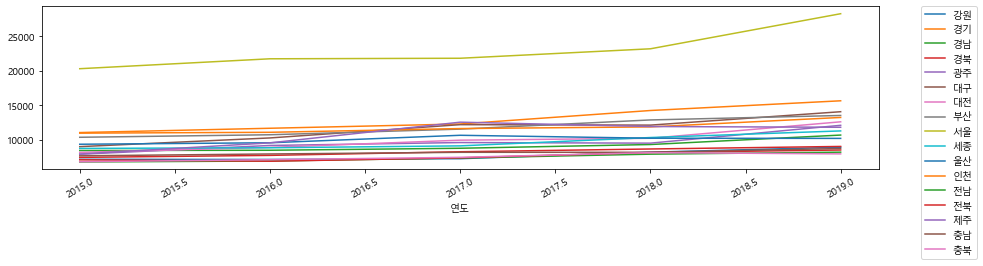

In [86]:
# 너무 선이 많아 보기 힘드므로, 일부 지역만 가져온다. 
p.plot(figsize=(15, 3), rot=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

* Box plot은 분포를 확인 할 수 없는 단점이 있다. -> violin plot 활용


* 추가. 데이터시각화의 중요성 : 기술통계량만으로는 데이터를 정확히 알 수 없다. 
  * 평균, 표준편차, 상관계수가 다 같은 데이터도 시각화 해보면 분포가 매우 다를 수 있다
  * https://www.autodesk.com/research/publications/same-stats-different-graphs

### Seaborn 으로 시각화 해보기

* 공식문서: https://seaborn.pydata.org/index.html
* seaborn은 통계적 기능을 포함하고 있어, groupby를 해주지 않아도 알아서 통계를 내준다 

In [64]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

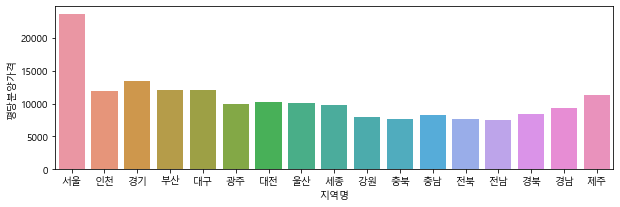

In [87]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

# ci: 신뢰구간. bootstraping으로 계산하여 추정하므로, 데이터가 큰 경우 출력에 굉장히 오랜시간이 걸린다. 95%로 고정되어있으니 none으로 할것을 추천

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

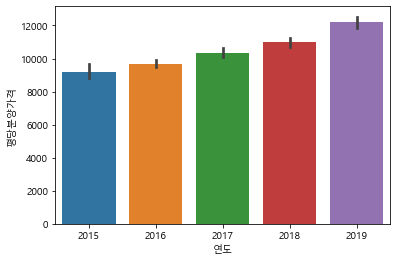

In [88]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last, x="연도", y="평당분양가격")

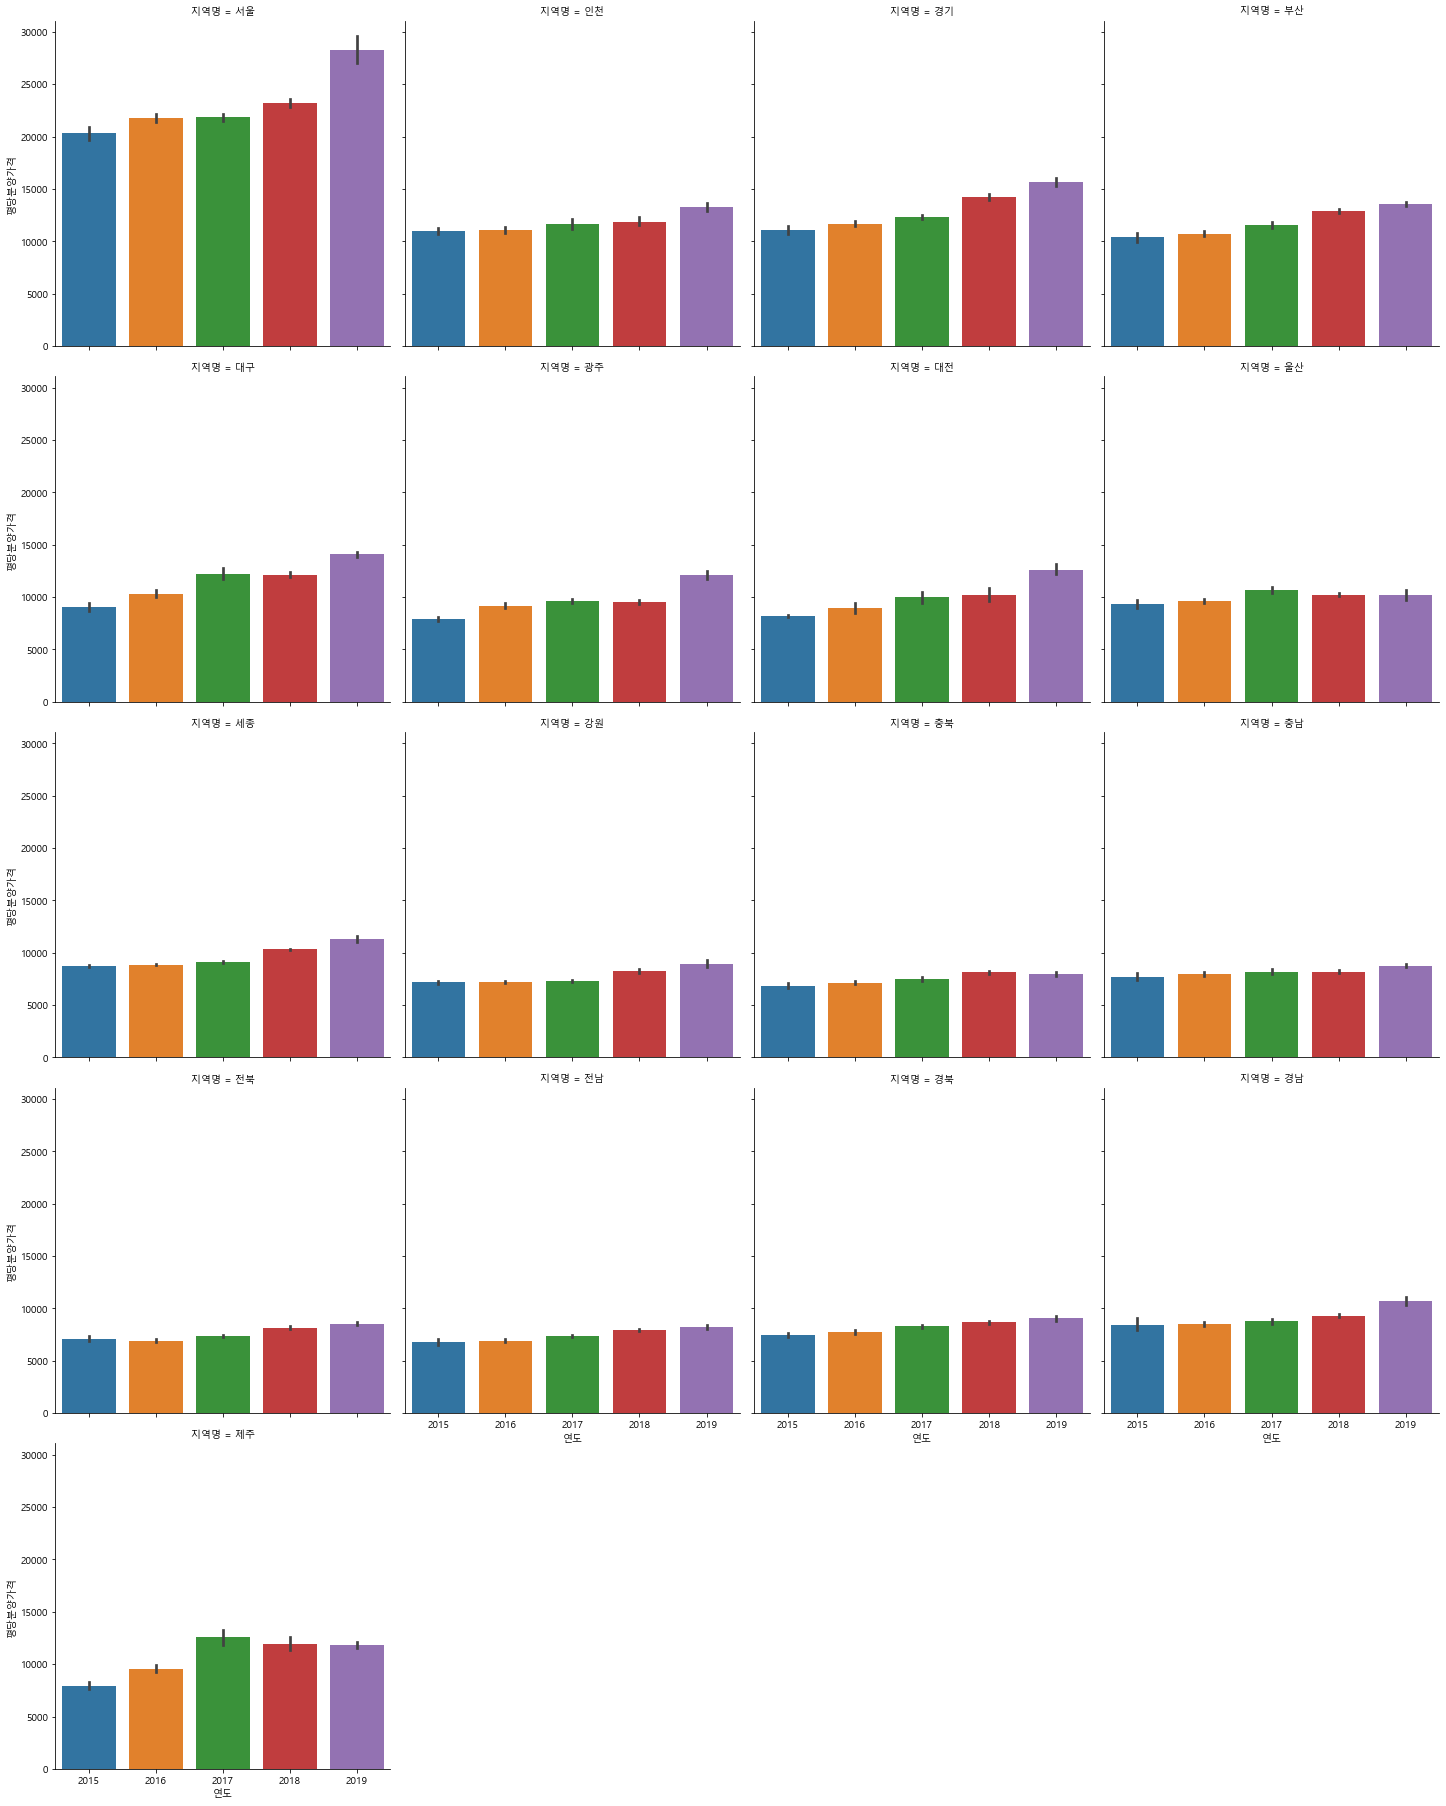

In [89]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

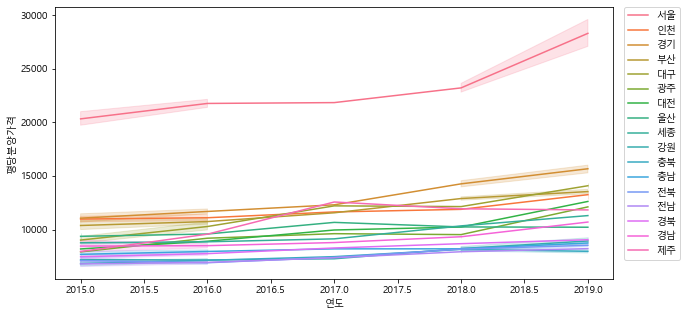

In [90]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue (색상) 옵션을 통해 지역별로 다르게 표시해 봅니다. hue는 범주형에 사용하는 것이 적절함
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")   #y값은 평균값으로 출력된다 . 도움말 참고 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

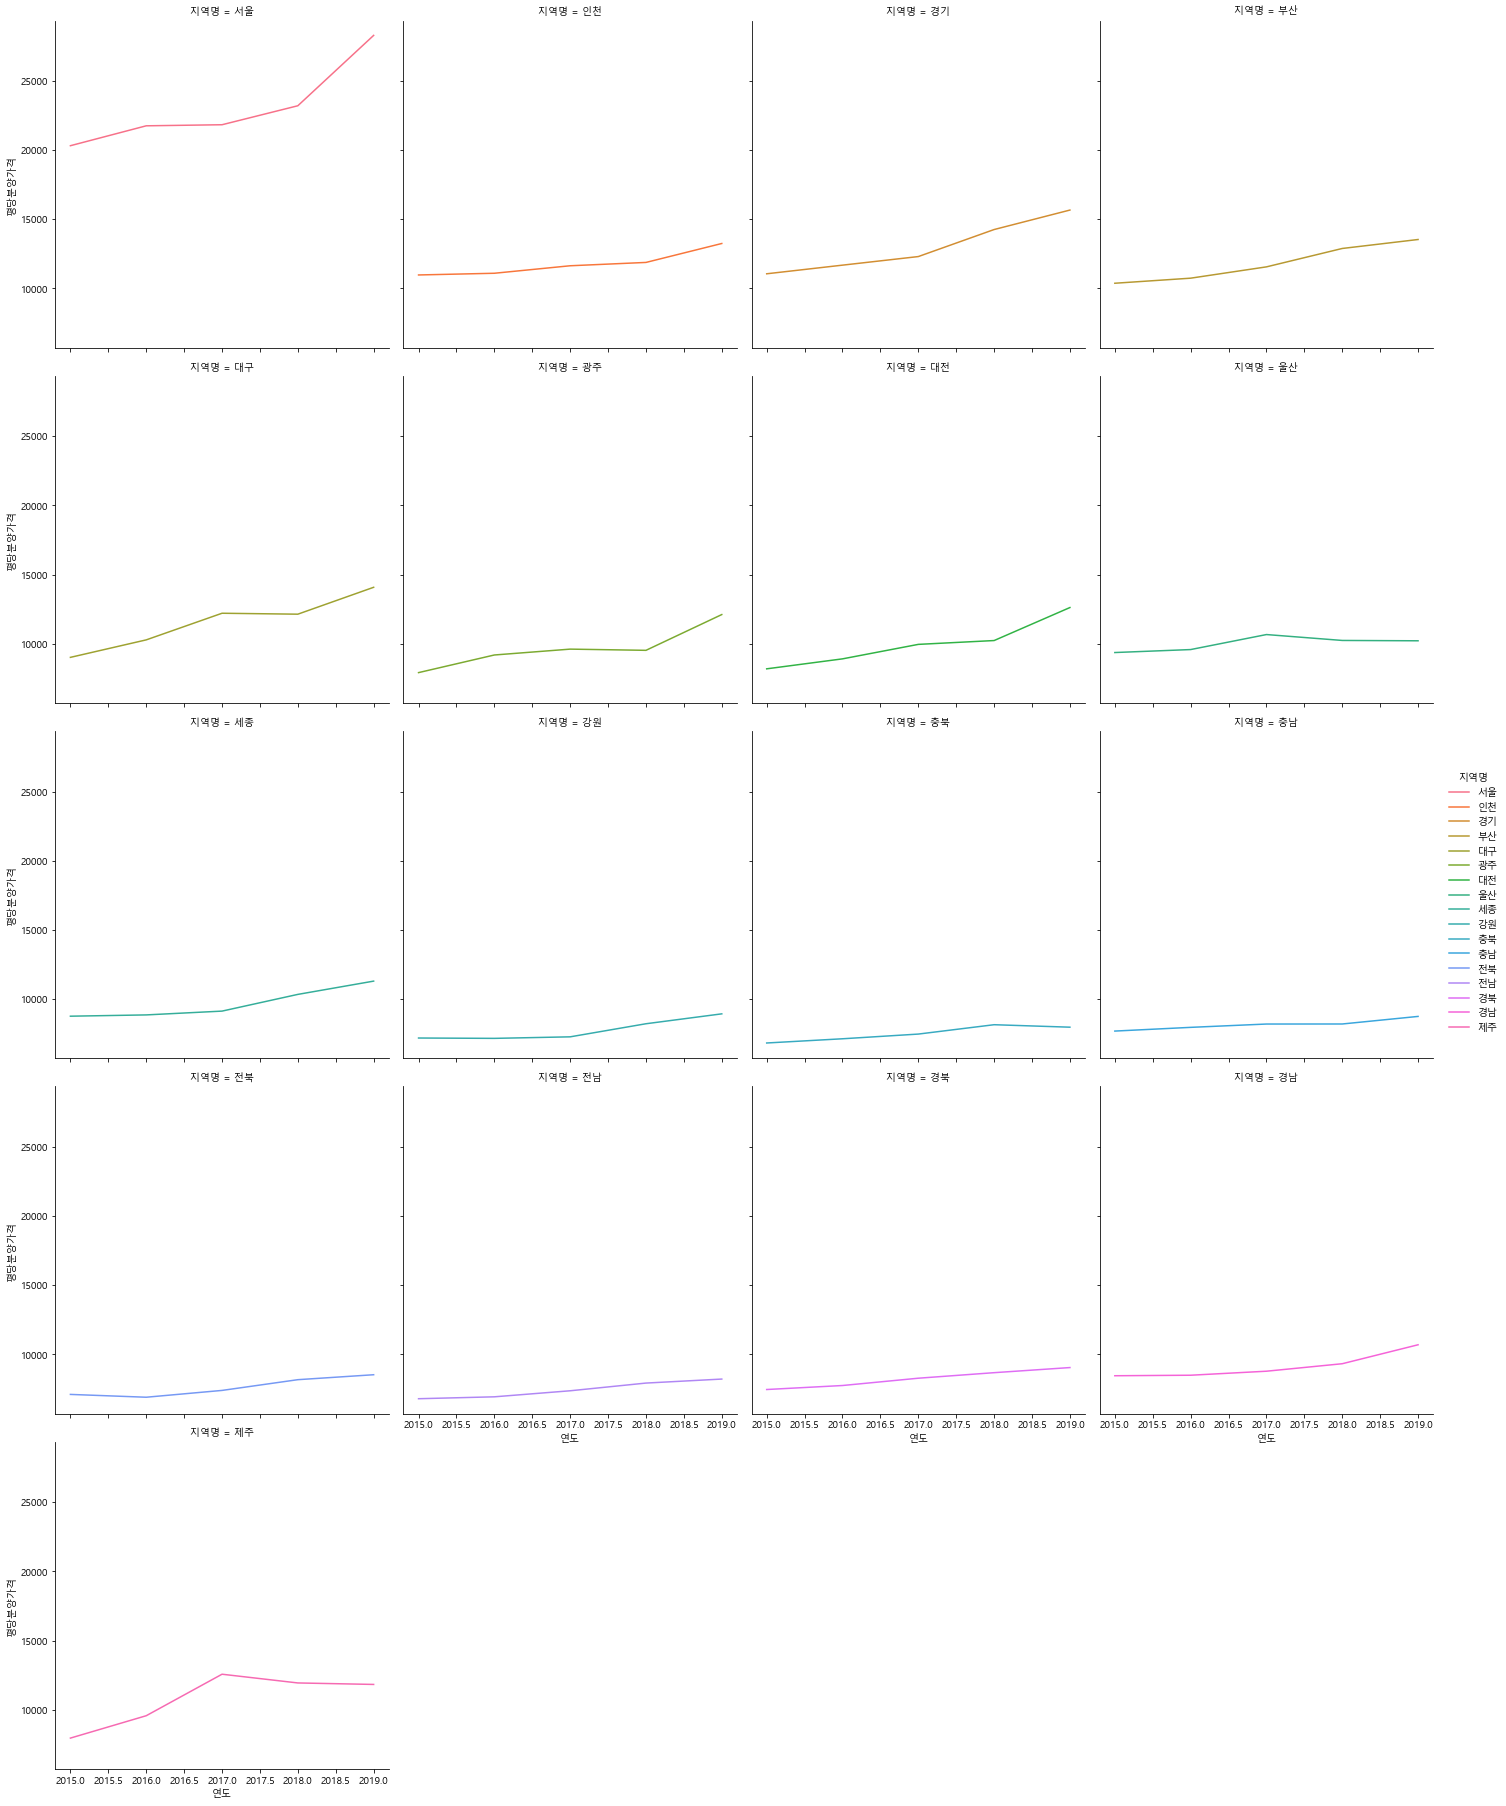

In [91]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)  

In [92]:
#일부 지역만 가져오기 
df_last_sub = df_last[df_last["지역명"].isin(["서울","경기","인천"])]
df_last_sub

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4260,경기,2019,12,14826.9,전체
4261,경기,2019,12,16272.3,60㎡
4262,경기,2019,12,14487.0,60㎡~85㎡
4263,경기,2019,12,17945.4,85㎡~102㎡


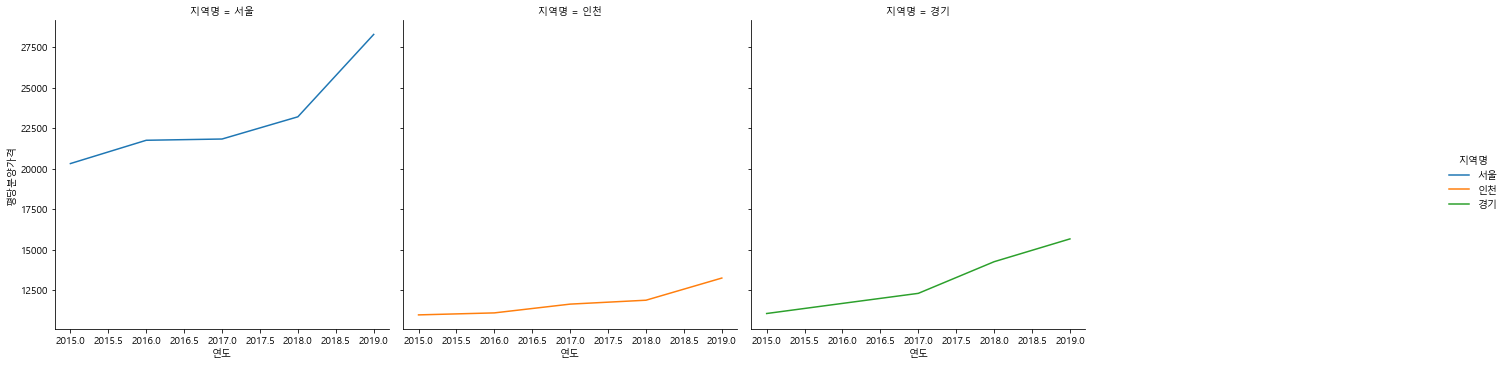

In [93]:
sns.relplot(data=df_last_sub, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None) 

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

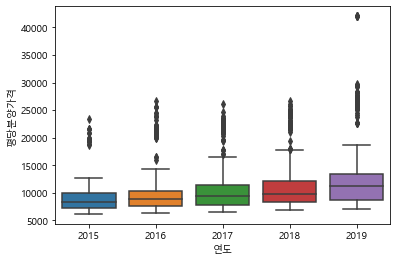

In [94]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

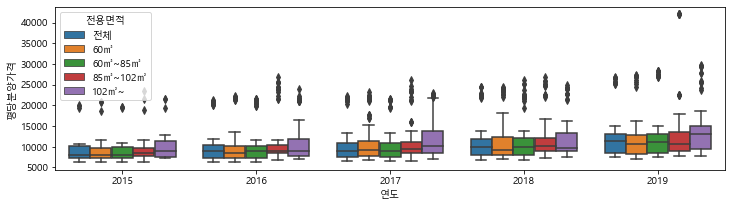

In [95]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

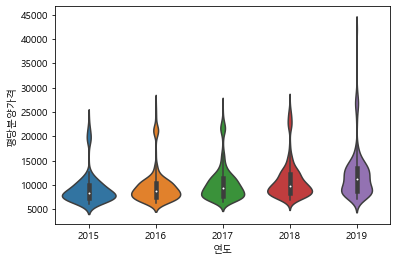

In [96]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.

sns.violinplot(data=df_last, x="연도", y="평당분양가격")

### lmplot과 swarmplot 

In [97]:
df_last["연도"].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

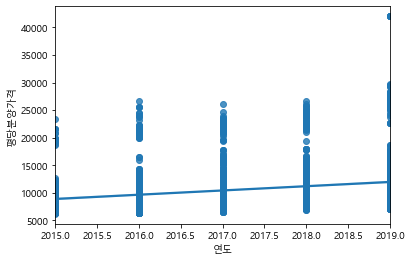

In [98]:
sns.regplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

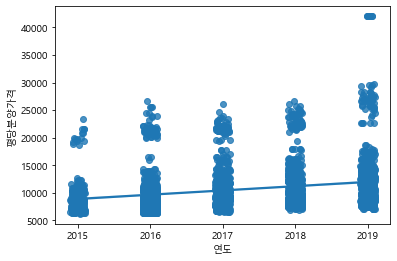

In [99]:
sns.regplot(data=df_last, x="연도", y="평당분양가격", x_jitter=.1)

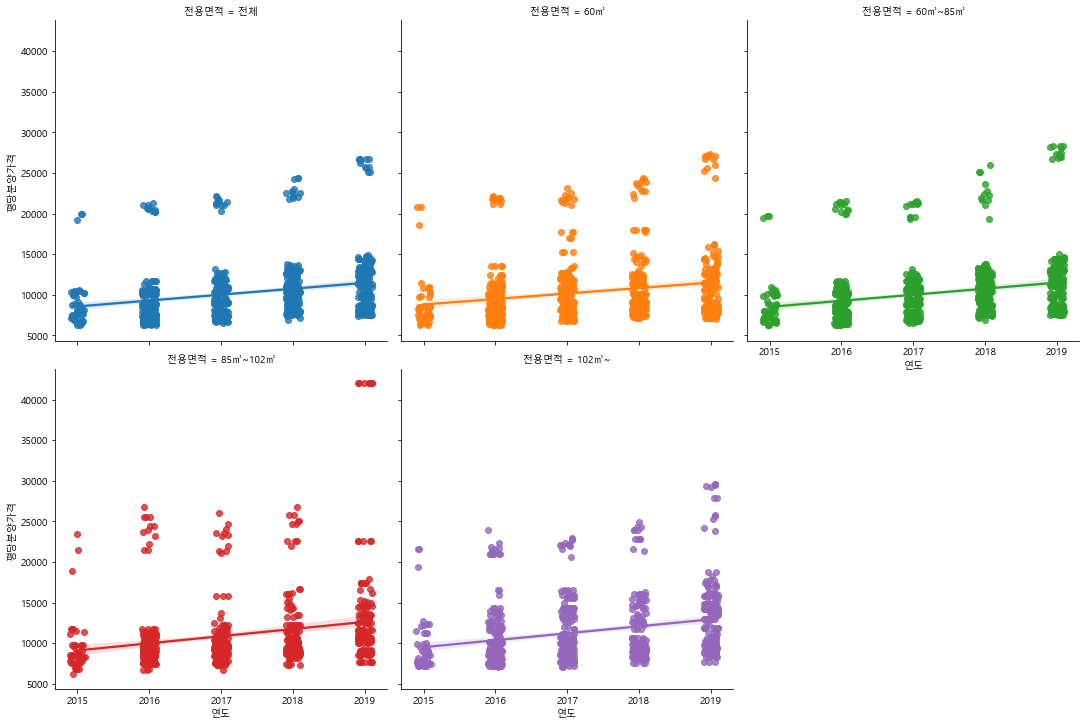

In [100]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3,  x_jitter=.1)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

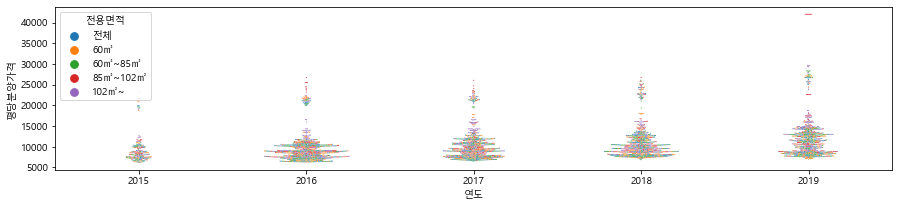

In [103]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", size=1) #size : 점 크기. 데이터 많으면 오래걸리고 보기 힘듬

### 이상치 보기

In [104]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.

df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [105]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [106]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,평당분양가격,전용면적
3743,서울,2019,6,42002.4,85㎡~102㎡
3828,서울,2019,7,42002.4,85㎡~102㎡
3913,서울,2019,8,42002.4,85㎡~102㎡
3998,서울,2019,9,42002.4,85㎡~102㎡
4083,서울,2019,10,42002.4,85㎡~102㎡
4168,서울,2019,11,42002.4,85㎡~102㎡
4253,서울,2019,12,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

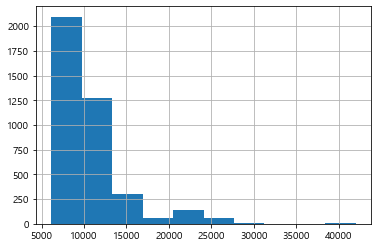

In [107]:
h = df_last["평당분양가격"].hist(bins=10) #bins: 막대갯수

In [108]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

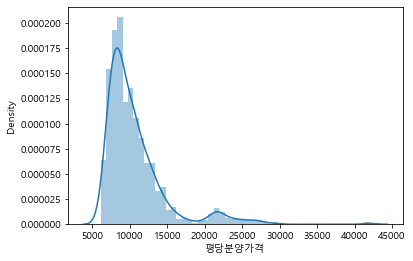

In [109]:
# distplot으로 평당분양가격을 표현해 봅니다.

sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

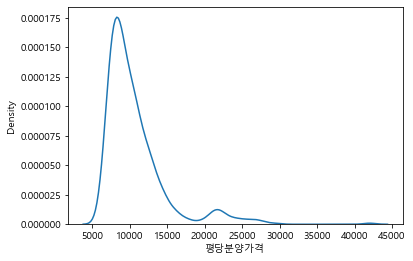

In [110]:
# sns.distplot(price, hist=False, rug=True)
sns.kdeplot(price)

* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

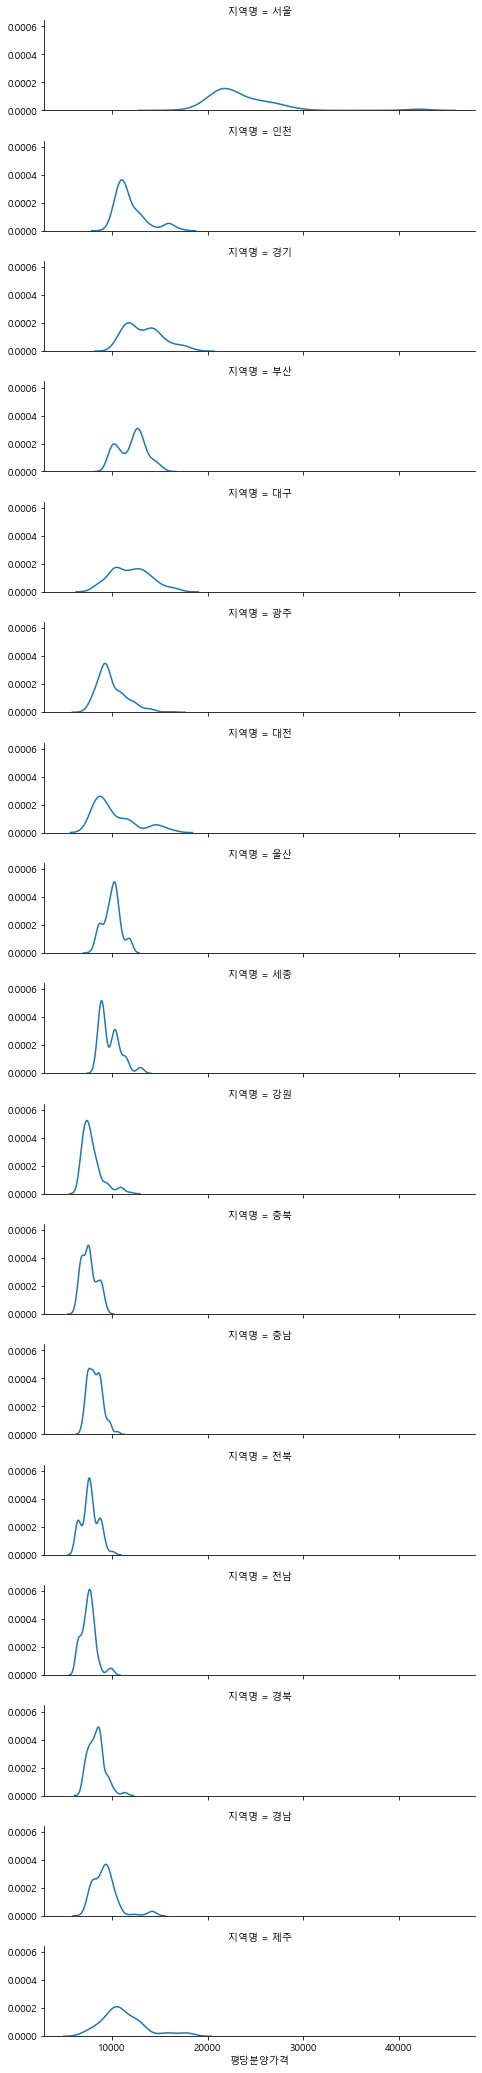

In [111]:
# subplot 으로 표현해 봅니다. 
g = sns.FacetGrid(df_last, row="지역명",    #colum으로 지정하면 옆으로 그린다. #pairgird: 여러 변수를 그릴때 유용. 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "평당분양가격");

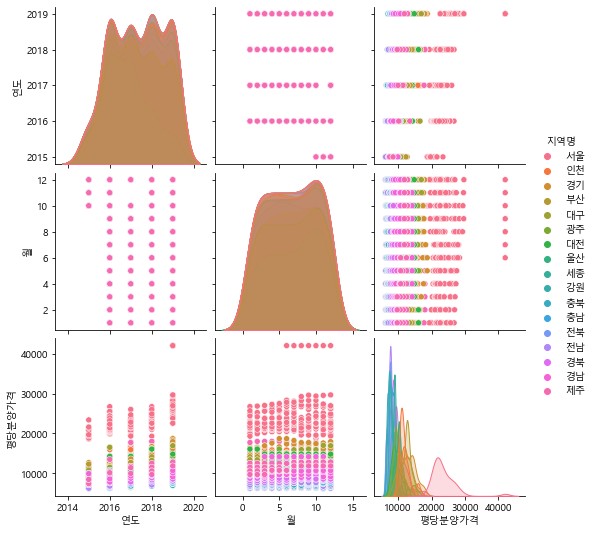

In [112]:
# pairplot
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                          ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [114]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.
df_last["전용면적"].value_counts()

85㎡~102㎡    867
60㎡~85㎡     867
60㎡         867
102㎡~       867
전체          867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [121]:
pd.options.display.max_columns = 25

In [122]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~


In [123]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [124]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [125]:
# 결측치가 있는지 봅니다.
df_first.isnull().sum() 

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [127]:
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체


In [126]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [130]:
df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [131]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 

df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [133]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [134]:
date = "2013년12월"
date

'2013년12월'

In [135]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")

['2013', '12월']

In [136]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split("년")[0]

'2013'

In [137]:
#월만가져오기
date.split("년")[-1]

'12월'

In [138]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

date.split("년")[-1].replace("월", "")

'12'

In [139]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [ ]:
def parse_year(date):
    year = date.split("년")

In [140]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)

2013

In [141]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

In [142]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [143]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [144]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


* Method Chaning을 사용하여 사용자정의 함수를 대체 해본다

In [148]:
df_first_melt["기간"].str.split("년", expand=True)[0].astype(int)

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
352    2015
353    2015
354    2015
355    2015
356    2015
Name: 0, Length: 357, dtype: int32

In [151]:
df_first_melt["기간"].str.split("년", expand=True)[1].str.replace("월","").astype(int)

0      12
1      12
2      12
3      12
4      12
       ..
352     8
353     8
354     8
355     8
356     8
Name: 1, Length: 357, dtype: int32

In [153]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.
df_last.sample()

,지역명,연도,월,평당분양가격,전용면적
2294,제주,2017,12,9995.7,102㎡~


In [154]:
# 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.
df_last.columns.to_list()

['지역명', '연도', '월', '평당분양가격', '전용면적']

In [155]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [157]:
df_last[df_last["전용면적"] == "전체"]

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
5,인천,2015,10,10437.9,전체
10,경기,2015,10,10355.4,전체
15,부산,2015,10,10269.6,전체
20,대구,2015,10,8850.6,전체
...,...,...,...,...,...
4310,전북,2019,12,8144.4,전체
4315,전남,2019,12,8091.6,전체
4320,경북,2019,12,9616.2,전체
4325,경남,2019,12,10107.9,전체


In [161]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
df_last.loc[df_last["전용면적"] == "전체", cols]

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [162]:
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.  
#copy  하지 않으면 melt데이터도 바뀐다??? 다시 검색해보자 
df_last_prepare = df_last.loc[
    df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [163]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.  
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [164]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [165]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [166]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [167]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
t = pd.pivot_table(df, index="연도", columns="지역명", 
                   values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

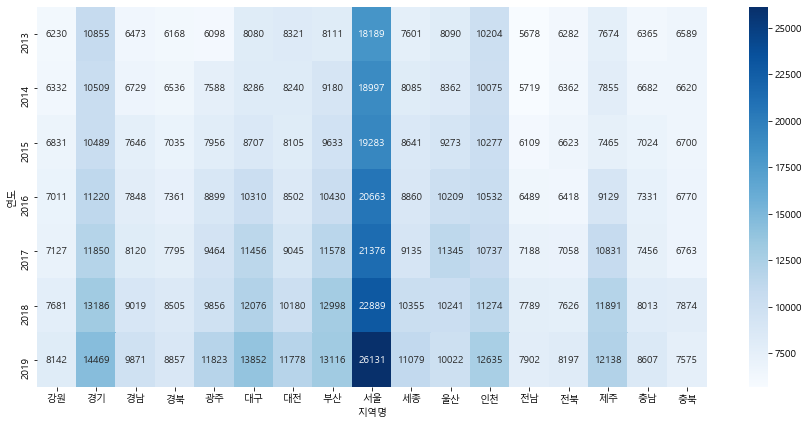

In [174]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
#annot: 숫자 표기 여부 / fmt: 숫자 포매팅. degault는 'e'n제곱 , ".0f"소숫점 0의자리까지 반올림
plt.figure(figsize=(15, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")      

In [170]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

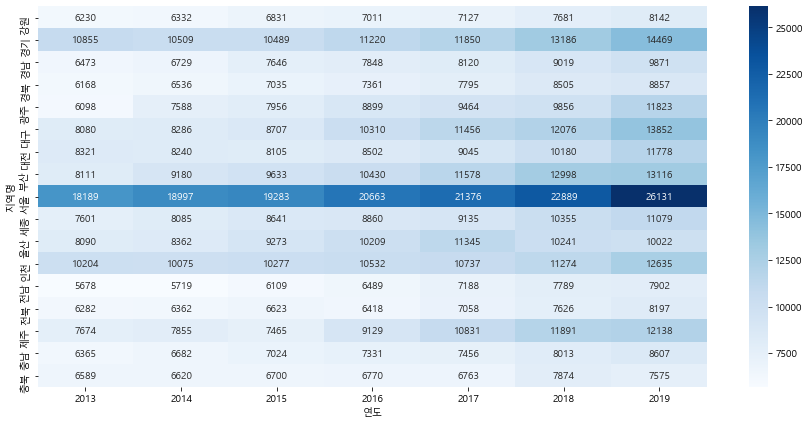

In [171]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.

plt.figure(figsize=(15, 7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

In [172]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

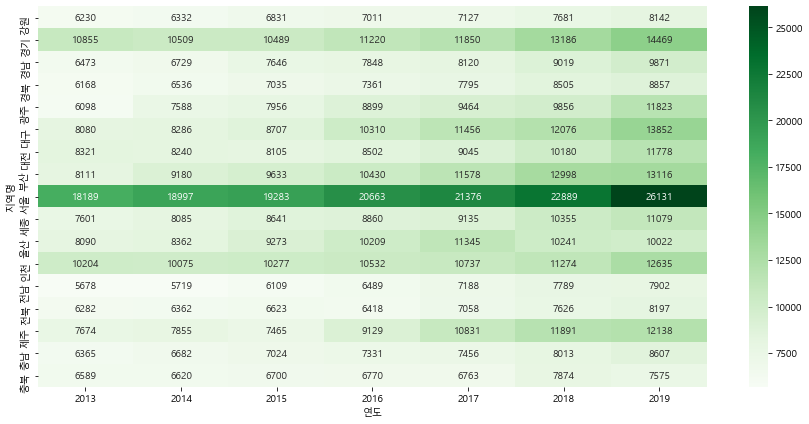

In [173]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

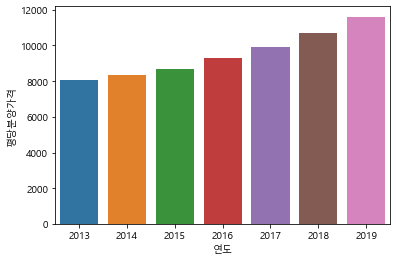

In [176]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격", ci=None)

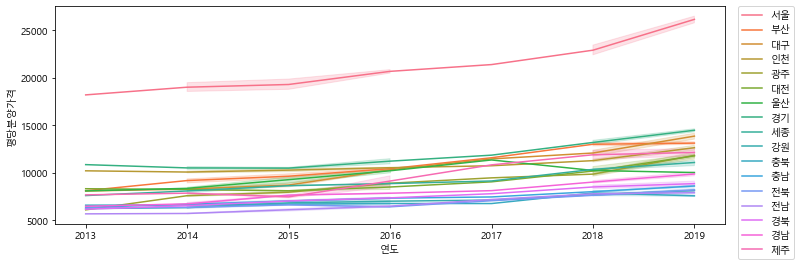

In [177]:
#Line Plot : 연속형으로 가정
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

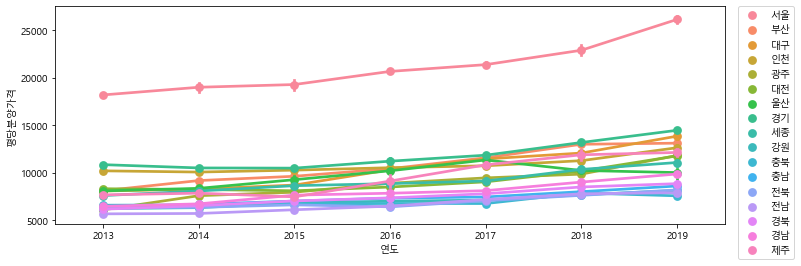

In [178]:
# pointplot 으로 연도별 평당분양가격 그리기 : 범주형데이터라고 가정 
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

(72, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

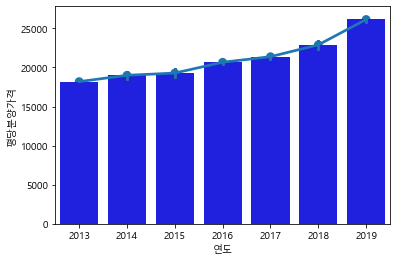

In [179]:
# 서울만 barplot 으로 그리기
df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="b")
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

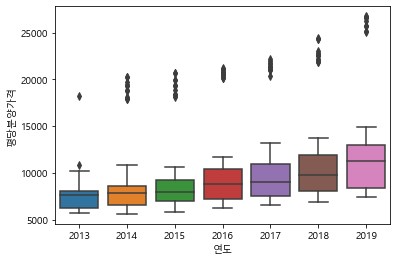

In [180]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

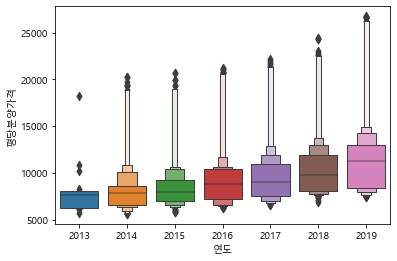

In [181]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")

Text(0.5, 1.0, '연도별 전국 평균 평당 분양가격(단위:천원)')

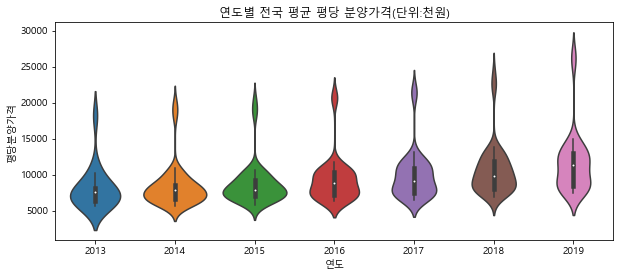

In [182]:
# 연도별 평당분양가격 violinplot 그리기
plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x="연도", y="평당분양가격").set_title("연도별 전국 평균 평당 분양가격(단위:천원)")

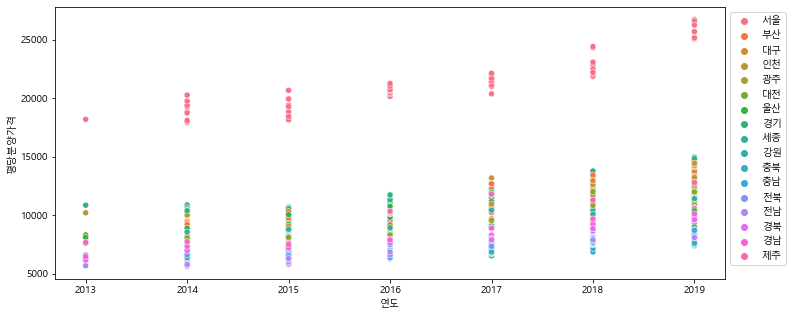

In [186]:
#scatter plot은 밀도를 확인할 수 없어 적절하지 않다. 연속형 자료일때 활용
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1,1))

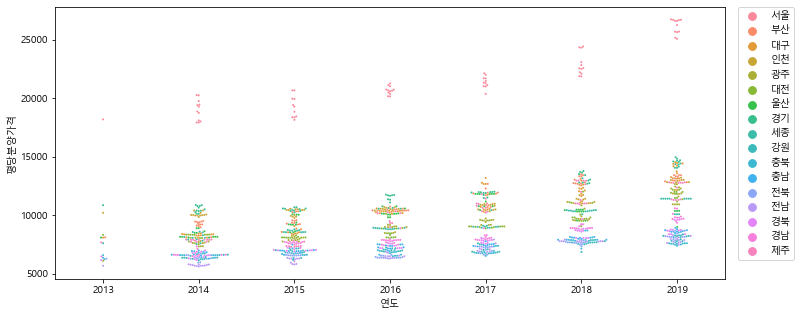

In [187]:
# 연도별 평당분양가격 swarmplot 그리기
plt.figure(figsize=(12, 5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명", size=2)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

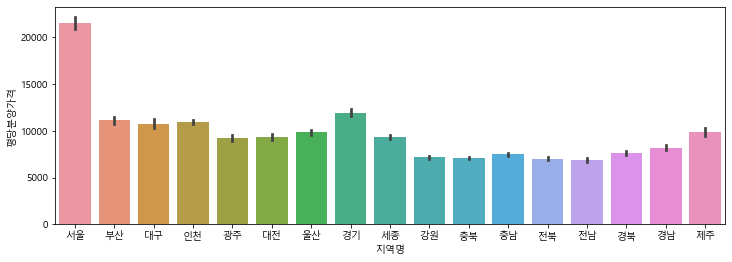

In [188]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

In [189]:
# 위와 같은 그래프를 미리 연산을 하고 결과값으로 그리는 방법
# groupby 로 구하기
mean_price = df.groupby(["지역명"])["평당분양가격"].mean().to_frame().sort_values(by="평당분양가격", ascending=False)
mean_price

,평당분양가격
지역명,
서울,21543.750704
경기,11960.452113
부산,11128.539437
인천,10923.187324
대구,10762.745070
제주,9874.488732
울산,9846.438710
세종,9347.860563
대전,9314.942254


<AxesSubplot:xlabel='지역명'>

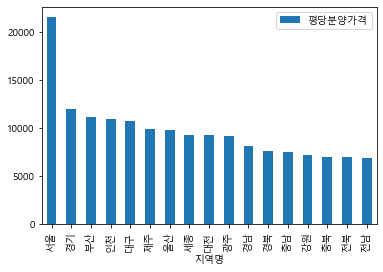

In [191]:
#pandas로 그리기 (groupby에 barplot 붙히기 )  :seaborn은 미리 계산해줌. 
mean_price.plot.bar() 

In [193]:
# groupby 로 했던 방법을 똑같이
# pivot_table 로 구하기
mean_price = df.pivot_table(index="지역명", values="평당분양가격").sort_values(by="평당분양가격", ascending=False)
mean_price

,평당분양가격
지역명,
서울,21543.750704
경기,11960.452113
부산,11128.539437
인천,10923.187324
대구,10762.745070
제주,9874.488732
울산,9846.438710
세종,9347.860563
대전,9314.942254


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

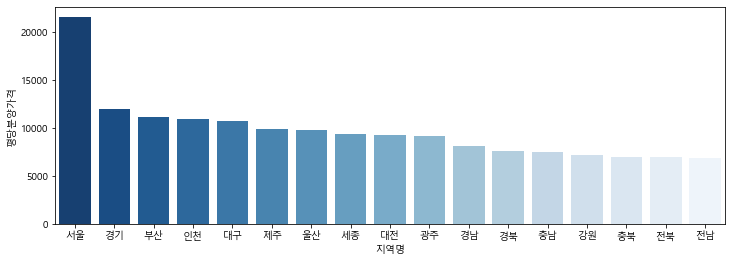

In [194]:
plt.figure(figsize=(12, 4))
sns.barplot(data=mean_price, x=mean_price.index, y="평당분양가격", palette="Blues_r")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

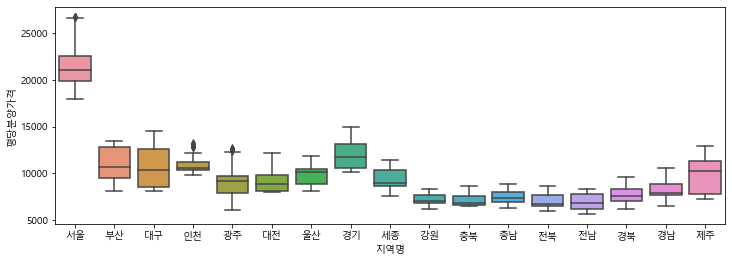

In [195]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

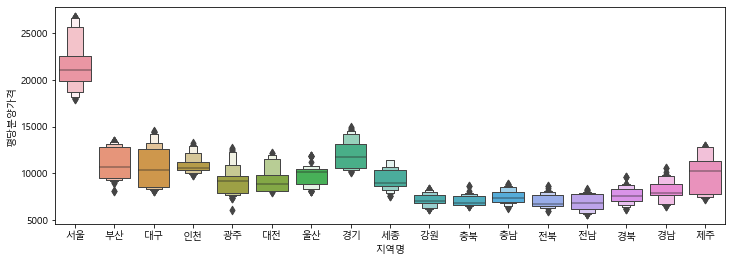

In [196]:

plt.figure(figsize=(12, 4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

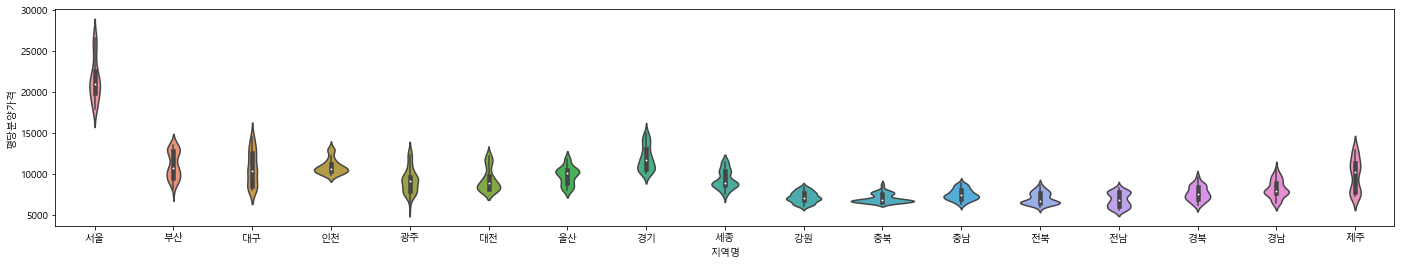

In [197]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(24, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

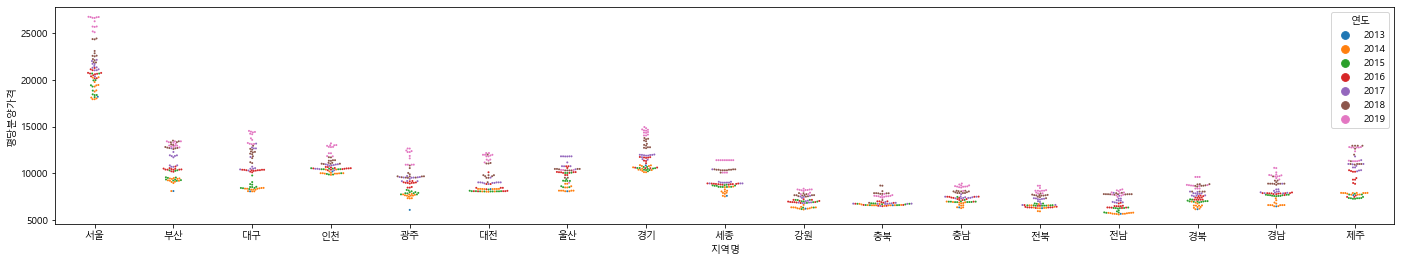

In [198]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.

plt.figure(figsize=(24, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도", size=2)